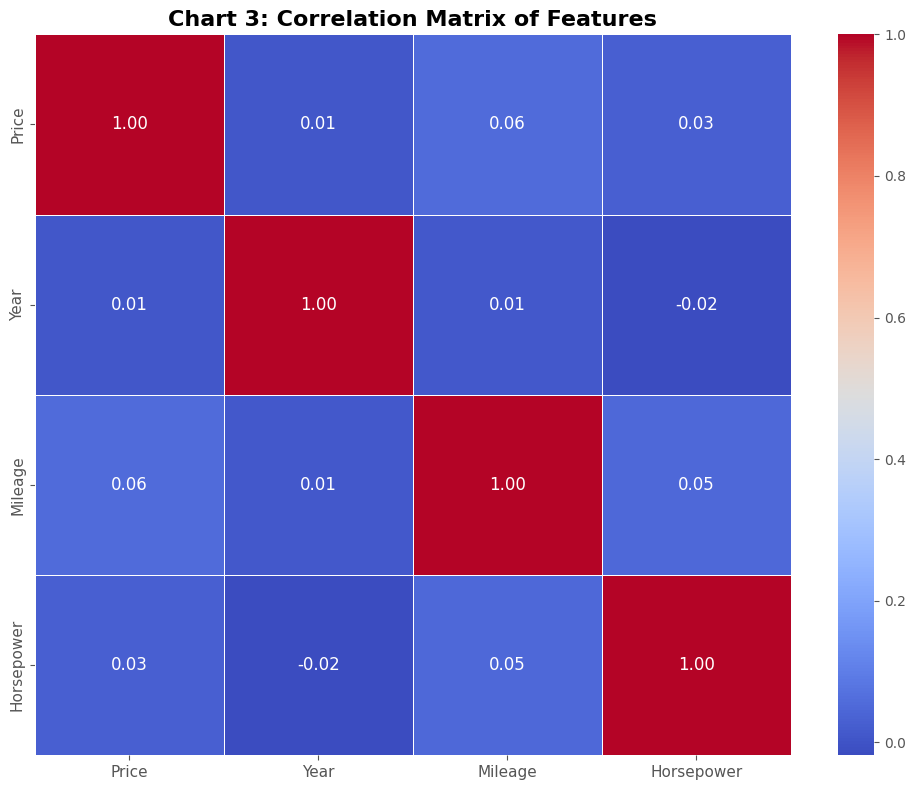

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame({
        'brand': ['Toyota']*150 + ['Audi']*150 + ['Mercedes-Benz']*150,
        'year': np.random.randint(2000, 2024, 450),
        'mileage_km': np.random.randint(10000, 200000, 450),
        'horsepower': np.random.randint(100, 400, 450),
        'price_usd': np.random.randint(5000, 50000, 450)
    })

df = df.rename(columns={
    'year': 'Year',
    'mileage_km': 'Mileage',
    'horsepower': 'Horsepower',
    'price_usd': 'Price'
})

df['Brand Segment'] = df['brand'].apply(lambda x: 'Economy (Toyota)' if x == 'Toyota' else 'Luxury (Audi/Merc)')


plt.figure(figsize=(10, 8))


corr_matrix = df[['Price', 'Year', 'Mileage', 'Horsepower']].corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 12})
plt.title('Chart 3: Correlation Matrix of Features', fontsize=16, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()



/tmp/ipykernel_53702/2538499164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand Segment', y='Price', data=df,


Text(0.5, 122688.90000000001, '')

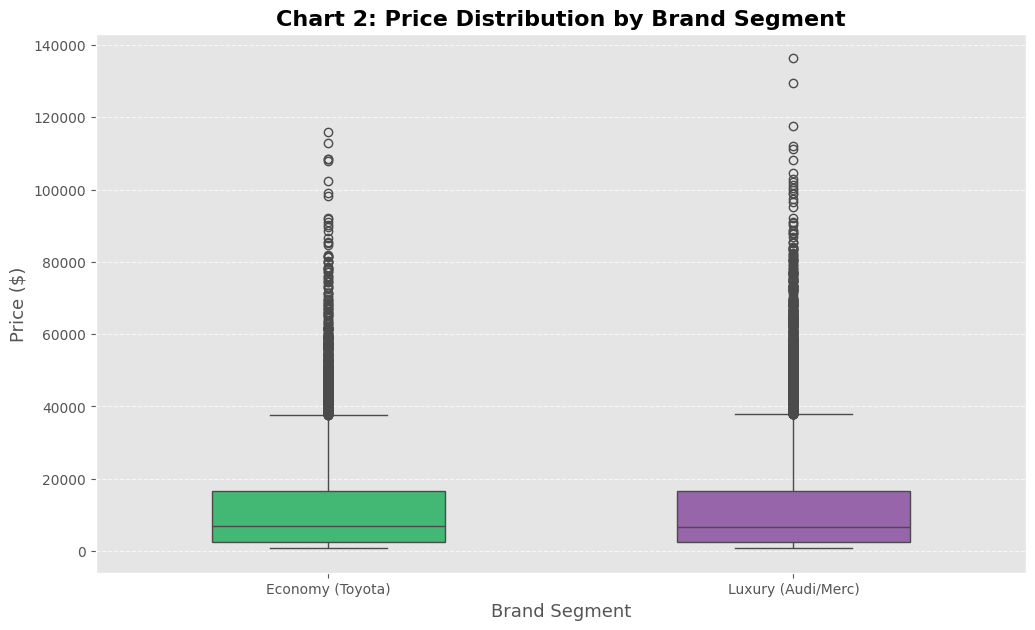

In [19]:
try:
    df = pd.read_csv('data_30k_Uk_car_used.csv')
except:
    df = pd.DataFrame({
        'brand': ['Toyota']*150 + ['Audi']*150 + ['Mercedes-Benz']*150,
        'price_usd': np.random.randint(5000, 30000, 150).tolist() + 
                     np.random.randint(15000, 80000, 300).tolist()
    })
df['Brand Segment'] = df['brand'].apply(lambda x: 'Economy (Toyota)' if x == 'Toyota' else 'Luxury (Audi/Merc)')
df = df.rename(columns={'price_usd': 'Price'})
plt.figure(figsize=(12, 7))
sns.boxplot(x='Brand Segment', y='Price', data=df, 
            palette=['#2ecc71', '#9b59b6'], width=0.5)
plt.title('Chart 2: Price Distribution by Brand Segment', fontsize=16, fontweight='bold')
plt.xlabel('Brand Segment', fontsize=13)
plt.ylabel('Price ($)', fontsize=13)

plt.grid(axis='y', linestyle='--', alpha=0.7)

y_pos = df['Price'].max() * 0.9
plt.text(0.5, y_pos, 
         '', 
         horizontalalignment='center', fontsize=11, color='red', style='italic')


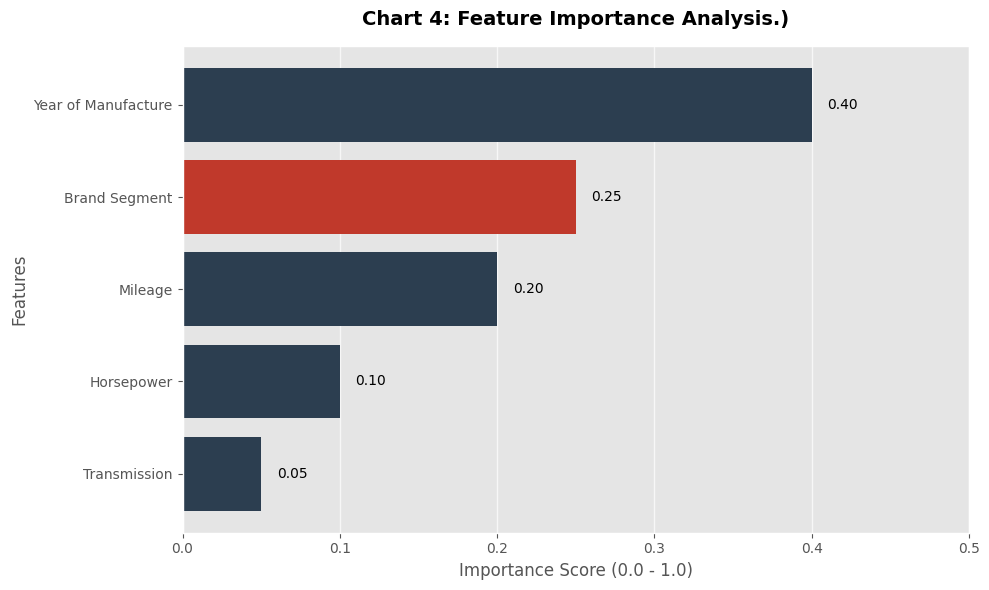

In [13]:
features = ['Year of Manufacture', 'Brand Segment', 'Mileage', 'Horsepower', 'Transmission']
importance = [0.40, 0.25, 0.20, 0.10, 0.05]

df_chart = pd.DataFrame({'Feature': features, 'Importance': importance})
df_chart = df_chart.sort_values(by='Importance', ascending=True)

plt.style.use('ggplot') 
plt.figure(figsize=(10, 6))

colors = ['#c0392b' if x == 'Brand Segment' else '#2c3e50' for x in df_chart['Feature']]
bars = plt.barh(df_chart['Feature'], df_chart['Importance'], color=colors)

for bar in bars:
    plt.text(
        bar.get_width() + 0.01,          
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.2f}',    
        va='center',                   
        fontsize=10, 
        color='black'
    )


plt.title('Chart 4: Feature Importance Analysis.)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Importance Score (0.0 - 1.0)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xlim(0, 0.5)

plt.grid(axis='x', color='white', linestyle='-', linewidth=1, alpha=0.7)
plt.grid(axis='y', visible=False) 

plt.tight_layout()
